<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting air pollution level in an area in Eindhoven in the upcoming week.

We're going to take the following approach:
1. Problem definition
2. Data
3. Features
4. Data Exploration & Visualization
5. Data Preparation
6. Modelling

<h2><font color=slateblue> 1. Problem Definition </font></h2>

In a statement,
> Given historical pollution data, weather data and people going through an area, can we predict air pollution level in an area in Eindhoven in the upcoming week?

<h2><font color=slateblue> 2. Data </font></h2>

The data is provided by TNO and Zicht op Data.

<h2><font color=slateblue> 3. Features </font></h2>

This is where you'll get different information about each of the features in our data.

We have three separate datasets for the period between 25-09-2021 and 30-12-2021:

**Air pollution**
* date: date in ymd_hms
* PC4: postcode
* pm2.5: particulate matter <2.5um in ug/m3
* pm10: particulate matter <10um in ug/m3
* no2: nitrogen dioxide in ug/m3
* no: nitrogen oxide in ug/m3
* so2: sulphur dioxide in ug/m3


**Meteo**
* date: date in ymd_hms
* PC4: postcode
* wd: wind direction in degrees 0-360
* ws: wind speed in m/s
* blh: boundary layer height in metres
* tcc: total cloud cover in oktas (0-9)
* ssrd: solar surface radiation downwards in W/m2 

(see https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview for more information)

**Zichtop**
* PC4: postcode
* date: date in ymd_hms
* pop_tot: total number of people in PC4 for each time step
* m00_30: number of people who have been there for up to 30 minutes
* m30_60: number of people who have been there for 30 and 60 minutes
* H1_2: number of people who have been there for 1 and 2 hours
* H2_4: number of people who have been there for 2 and 4 hours
* H4_8: number of people who have been there for 4 and 8 hours
* H8_16: number of people who have been there for 8 and 16 hours
* H16plus: number of people who have been there for over 16 hours

<h2><font color=slateblue> 4. Data Exploration & Visualization </font></h2>

<h3><font color=steelblue>Explore the meteo data</font><h3>

<h4><font color=mediumvioletred>Read CSV files and get meteo data sample</font></h4>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_meteo = pd.read_csv("data/meteo.csv")
df_air_pollution = pd.read_csv("data/air_pollution.csv")
df_meteo.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
232511,2021-07-17 23:00:00,5652,98.453430,2.351162,198.025925,0.000000,0.000000
227668,2021-12-28 04:00:00,5651,273.183563,4.758546,515.898499,0.584514,0.000000
94842,2021-10-29 18:00:00,5624,250.668884,5.661692,899.543762,0.996007,0.000000
195467,2021-04-25 11:00:00,5644,61.174820,3.631232,1183.005981,0.925585,498.387500
250589,2021-08-10 05:00:00,5654,233.508011,3.470477,317.930725,0.513039,11.182894
165916,2021-12-10 04:00:00,5633,302.348145,5.649457,900.176392,0.997464,0.000000
86944,2021-12-04 16:00:00,5623,178.652435,4.719932,840.600281,0.800192,1.270305
104504,2021-12-06 08:00:00,5625,308.520111,1.853987,64.687752,1.000000,3.222932
225319,2021-09-21 07:00:00,5651,12.908099,1.018451,86.801544,0.984353,86.969696
112150,2021-10-20 22:00:00,5626,257.430847,4.842998,542.545471,0.902503,0.000000


<h4><font color=mediumvioletred>Get air pollution data sample</font></h4>

In [3]:
df_air_pollution.sample(10)

,date,PC4,pm10,pm2.5,no2,no,so2
55741,2021-12-04 12:00:00,5626,15.998183,31.459824,31.153755,8.482313,2.457564
9004,2021-11-04 04:00:00,5616,24.015886,20.379946,45.390858,29.697210,4.736389
62942,2021-12-13 13:00:00,5629,17.860420,26.663290,14.176441,1.971341,2.039686
56346,2021-12-05 17:00:00,5615,25.537794,36.606403,32.720759,5.008249,0.738409
16849,2021-10-27 01:00:00,5624,3.317280,2.615689,10.833484,7.087864,1.873638
10781,2021-11-11 05:00:00,5617,48.373238,29.998053,35.136165,22.988023,8.682822
22402,2021-11-26 10:00:00,5627,17.392635,8.978808,27.962307,18.294488,4.832201
18691,2021-11-05 19:00:00,5625,12.768271,7.026119,47.465937,31.054842,4.586689
51817,2021-10-10 01:00:00,5658,42.146145,26.590425,41.586426,27.208141,12.834226
35058,2021-11-17 18:00:00,5643,16.078655,13.257667,55.977989,36.623897,2.115201


<h4><font color=mediumvioletred>Show all postal codes</font></h4>

In [4]:
df_meteo['PC4'].unique()

array([5611, 5612, 5613, 5614, 5615, 5616, 5617, 5621, 5622, 5623, 5624,
       5625, 5626, 5627, 5628, 5629, 5631, 5632, 5633, 5641, 5642, 5643,
       5644, 5645, 5646, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658])

<h4><font color=mediumvioletred>Show the shape of the meteo data</font></h4>

In [5]:
df_meteo.shape

(289080, 7)

<h4><font color=mediumvioletred>Show all datatypes of meteo data</font></h4>

In [6]:
df_meteo['date'] = pd.to_datetime(df_meteo['date'])
df_air_pollution['date'] = pd.to_datetime(df_air_pollution['date'])
df_meteo.dtypes

date    datetime64[ns]
PC4              int64
wd             float64
ws             float64
blh            float64
tcc            float64
ssrd           float64
dtype: object

<h4><font color=mediumvioletred>Filter meteo data on single postal code and get a sample</font></h4>

In [7]:
postalcode = df_meteo[df_meteo['PC4'] == 5611]
postalcode.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
8079,2021-12-03 15:00:00,5611,236.569916,6.836812,759.275513,0.998020,10.335215
2019,2021-03-26 03:00:00,5611,260.864624,4.084415,269.376373,0.618012,0.000000
7245,2021-10-29 21:00:00,5611,240.877319,3.826397,605.235291,0.934010,0.000000
3008,2021-05-06 08:00:00,5611,212.069427,3.059272,715.632935,0.981315,345.155625
4900,2021-07-24 04:00:00,5611,12.065990,3.460654,204.253479,0.993148,0.081778
4939,2021-07-25 19:00:00,5611,250.197586,0.978279,148.635452,0.778954,68.373524
3217,2021-05-15 01:00:00,5611,181.150467,0.873751,62.308968,0.672097,0.000000
7007,2021-10-19 23:00:00,5611,233.968018,6.627673,787.706360,0.973423,0.000000
8695,2021-12-29 07:00:00,5611,201.657776,3.336102,403.669128,1.000000,0.000000
5614,2021-08-22 22:00:00,5611,136.026398,4.050925,526.928528,0.934622,0.000000


<h3><font color=steelblue>Visualize meteo data</font><h3>

<h4><font color=mediumvioletred>Visualize windspeed compared to solar surface radiation downwards</font></h4>

[Text(0.5, 1.0, 'Windspeed compared to the solar surface radiation downwards \n'),
 Text(0.5, 0, 'Windspeed in m/s'),
 Text(0, 0.5, 'Solar surface radiation downwards in W/m2')]

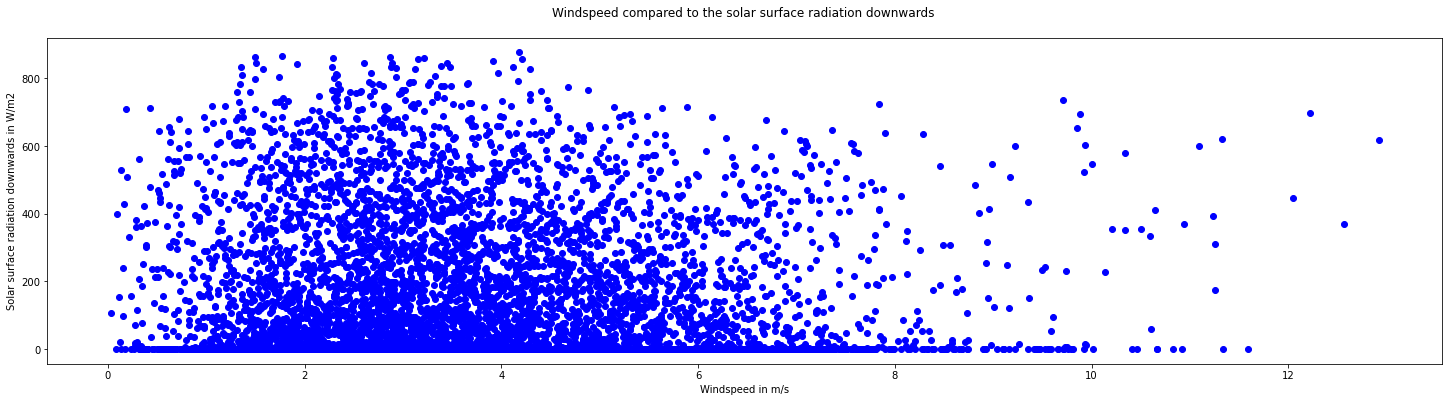

In [8]:
fig, ax = plt.subplots(figsize=(25, 6))
scatter = ax.scatter((postalcode["ws"]),
                list(postalcode["ssrd"]),
                color="blue")

ax.set(title="Windspeed compared to the solar surface radiation downwards \n",
      xlabel="Windspeed in m/s",
      ylabel="Solar surface radiation downwards in W/m2")

<h4><font color=mediumvioletred>Visualize windspeed in a single day from a specific postal code</font></h4>

[Text(0.5, 1.0, 'Windspeed in a day \n'),
 Text(0.5, 0, 'Date and time'),
 Text(0, 0.5, 'Windspeed in m/s')]

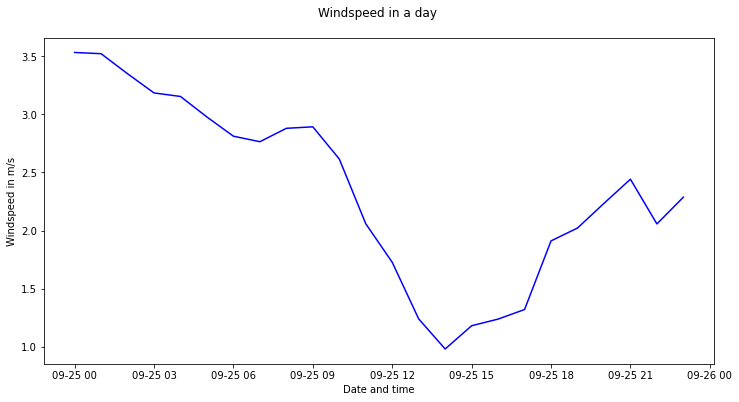

In [19]:
one_day = postalcode[postalcode['date']. dt. strftime('%Y-%m-%d')=='2021-09-25']

fig, ax = plt.subplots(figsize=(12, 6))
plot = ax.plot(list(one_day["date"]),
                list(one_day["ws"]),
                color="blue")

ax.set(title="Windspeed in a day \n",
      xlabel="Date and time",
      ylabel="Windspeed in m/s")

<h3><font color=steelblue>Merge datasets of meteo and air pollution</font><h3>

<h4><font color=mediumvioletred>Merge meteo and air pollution dataset and show sample</font></h4>

In [10]:
df_meteo_air_pollution = pd.merge(df_meteo, df_air_pollution[['PC4','date', 'pm10', 'pm2.5', 'no2',	'no', 'so2']], on=['PC4', 'date'])
df_meteo_air_pollution.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2
50022,2021-11-11 06:00:00,5643,250.362045,1.679854,55.691483,0.976200,0.000000,41.818199,28.513741,29.332617,19.191021,5.166428
17123,2021-10-29 11:00:00,5621,293.756622,5.489837,799.718750,0.290513,336.113889,11.338547,6.937031,9.110196,5.960394,1.362626
21851,2021-11-01 11:00:00,5623,236.444244,7.845581,1220.474976,0.875254,334.244479,10.635045,5.253545,14.830440,9.702894,2.286226
50710,2021-12-09 21:00:00,5643,266.046722,4.244159,398.370056,0.186117,0.000000,26.680510,39.046770,21.934515,0.325661,2.398597
40023,2021-10-13 15:00:00,5632,155.778137,3.580598,916.649719,0.930965,107.816102,8.865189,2.723843,14.211678,9.298066,0.776577
7125,2021-09-30 21:00:00,5614,252.865952,5.955564,784.526428,0.989183,0.000000,7.451229,4.081826,17.354343,11.354171,1.768891
2360,2021-09-26 08:00:00,5612,250.485535,2.354292,186.336777,0.554875,115.794201,19.863632,8.281508,10.404769,6.807375,3.523887
47344,2021-10-27 16:00:00,5642,249.022507,4.116976,610.267883,0.883043,58.536719,12.976968,6.689512,26.822201,17.548567,1.797788
75813,2021-11-18 21:00:00,5658,214.334885,4.483540,460.777466,1.000000,0.000000,15.394722,9.786714,35.422707,23.175495,5.850967
46374,2021-12-23 05:00:00,5641,264.277435,2.825673,248.194305,1.000000,0.000000,39.158700,74.352750,17.448017,0.318666,3.448323


<h3><font color=steelblue>Look for corrolations between meteo data and air pollution data</font><h3>

<h4><font color=mediumvioletred>Show corrolation between merged meteo and air pollution data</font></h4>

In [11]:
df_meteo_air_pollution.corr(method='spearman')

,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2
PC4,1.000000,-0.000203,-0.001175,-0.000395,-0.000085,0.000106,-0.026865,-0.028674,-0.034462,-0.027125,0.004346
wd,-0.000203,1.000000,0.190082,0.048322,0.050032,0.032333,-0.148475,-0.106274,-0.161741,-0.109364,-0.008121
ws,-0.001175,0.190082,1.000000,0.807271,0.176822,0.073962,-0.607904,-0.472557,-0.591700,-0.499212,-0.212465
blh,-0.000395,0.048322,0.807271,1.000000,0.200182,0.341155,-0.615602,-0.542800,-0.655762,-0.502562,-0.337730
tcc,-0.000085,0.050032,0.176822,0.200182,1.000000,0.001251,-0.031441,0.110042,-0.105527,-0.186421,-0.208994
ssrd,0.000106,0.032333,0.073962,0.341155,0.001251,1.000000,-0.059004,-0.158170,-0.206825,-0.049303,-0.076840
pm10,-0.026865,-0.148475,-0.607904,-0.615602,-0.031441,-0.059004,1.000000,0.886844,0.560476,0.283385,0.336788
pm2.5,-0.028674,-0.106274,-0.472557,-0.542800,0.110042,-0.158170,0.886844,1.000000,0.431592,0.014917,0.189855
no2,-0.034462,-0.161741,-0.591700,-0.655762,-0.105527,-0.206825,0.560476,0.431592,1.000000,0.735620,0.394545
no,-0.027125,-0.109364,-0.499212,-0.502562,-0.186421,-0.049303,0.283385,0.014917,0.735620,1.000000,0.371746


<h4><font color=mediumvioletred>Show corrolation between particulate matter smaller than 10 um and windspeed</font></h4>

-0.4220468437258586


Text(0, 0.5, 'particulate matter <10um in ug/m3')

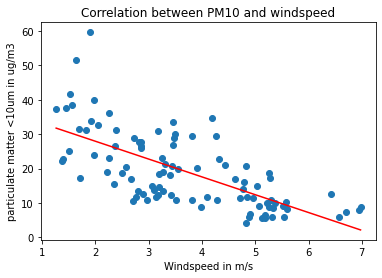

In [18]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm10_corr = group_by_day["ws"].corr(group_by_day["pm2.5"])
print(ws_pm10_corr)
plt.scatter(group_by_day["ws"], group_by_day["pm10"])
plt.plot(np.unique(group_by_day["ws"]), np.poly1d(np.polyfit(group_by_day["ws"], group_by_day["pm10"], 1))
         (np.unique(group_by_day["ws"])), color='red')
plt.title('Correlation between PM10 and windspeed')
plt.xlabel('Windspeed in m/s')
plt.ylabel('particulate matter <10um in ug/m3')

<h2><font color=slateblue> 5. Data Preparation </font></h2>

<h2><font color=slateblue> 6. Modelling </font></h2>